**Machine Learning Lab (PMCA507P)**


> **Reg No :** 23MCA1030

>**Name :** Vinayak Kumar Singh

**Exercise 10 :  K-means Clustering**

**Collab url :** https://colab.research.google.com/drive/1ImEq-QLso4VldjYncy3IhanH53uEt8Iw?usp=sharing

#Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

#Load the dataset

In [ ]:
data = pd.read_csv('/content/StudentsPerformance.csv')
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gender                   1000 non-null   object
 1   race                     1000 non-null   object
 2   parental_education       1000 non-null   object
 3   lunch                    1000 non-null   object
 4   test_preparation_course  1000 non-null   object
 5   math_score               1000 non-null   int64 
 6   reading_score            1000 non-null   int64 
 7   writing_score            1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
data

,gender,race,parental_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Encode categorical variables

In [ ]:
label_encoders = {}
for column in ['gender', 'race', 'parental_education', 'lunch', 'test_preparation_course']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Feature selection
features = ['gender', 'race', 'parental_education', 'lunch', 'test_preparation_course',
            'math_score', 'reading_score', 'writing_score']
X = data[features]
y = data['math_score']  # Predicting math scores, you can change this to reading_score or writing_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 1.1386555
R^2 Score: 0.9953206912677982


In [ ]:
# Define grading criteria
def get_grade(score):
    if score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    elif score >= 60:
        return 'D'
    else:
        return 'F'

# Apply grading criteria to predicted scores
predicted_grades = [get_grade(score) for score in y_pred]

# Get actual grades from the test set
actual_grades = [get_grade(score) for score in y_test]

# Compare predicted grades with actual grades
correct_predictions = sum(1 for pred, actual in zip(predicted_grades, actual_grades) if pred == actual)
total_predictions = len(predicted_grades)

# Calculate accuracy
accuracy = correct_predictions / total_predictions
print("Accuracy:", accuracy)


Accuracy: 0.99


In [ ]:
# Define a function to calculate the score based on groups
def calculate_group_score(group):
    group_data = data[data['race'] == group]
    score = group_data[['math_score', 'reading_score', 'writing_score']].mean(axis=0)
    return score.mean()

# Calculate scores for each group
group_scores = {}
for group in data['race'].unique():
    group_scores[group] = calculate_group_score(group)

# Print the scores for each group
for group, score in group_scores.items():
    print(f"Group {group}: {score}")


Group 1: 65.46842105263157
Group 2: 67.13166144200626
Group 0: 62.99250936329588
Group 3: 69.1793893129771
Group 4: 72.75238095238096


In [ ]:
# Calculate total score for each student
data['total_score'] = data['math_score'] + data['reading_score'] + data['writing_score']

# Define grading criteria based on total marks
def get_grade(total_score):
    if total_score >= 240:
        return 'A'
    elif total_score >= 180:
        return 'B'
    elif total_score >= 120:
        return 'C'
    else:
        return 'D'

# Assign grades to students based on total marks
data['grade'] = data['total_score'].apply(get_grade)

# Print the grades for each student
print(data[['gender', 'race', 'parental_education', 'lunch', 'test_preparation_course', 'total_score', 'grade']])

     gender  race  parental_education  lunch  test_preparation_course  \
0         0     1                   1      1                        1   
1         0     2                   4      1                        0   
2         0     1                   3      1                        1   
3         1     0                   0      0                        1   
4         1     2                   4      1                        1   
..      ...   ...                 ...    ...                      ...   
995       0     4                   3      1                        0   
996       1     2                   2      0                        1   
997       0     2                   2      0                        0   
998       0     3                   4      1                        0   
999       0     3                   4      0                        1   

     total_score grade  
0            218     B  
1            247     A  
2            278     A  
3            148     C 

In [ ]:
# Define grading criteria based on total marks
def get_grade(total_score):
    if total_score >= 240:
        return 'A'
    elif total_score >= 180:
        return 'B'
    elif total_score >= 120:
        return 'C'
    else:
        return 'D'

# Calculate total score for each student
data['total_score'] = data['math_score'] + data['reading_score'] + data['writing_score']

# Assign grades to students based on total marks
data['grade'] = data['total_score'].apply(get_grade)

# Function to get grade based on index number
def get_grade_by_index(index_no):
    student_row = data.iloc[index_no]  # Retrieve the row corresponding to the index number
    return student_row['grade']  # Retrieve the grade from the 'grade' column

# Example usage:
index_no = 10  # Example index number
grade = get_grade_by_index(index_no)
print(f"Grade of student at index {index_no}: {grade}")

Grade of student at index 10: C


## Check for missing values in the dataset

In [ ]:
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
gender                     0
race                       0
parental_education         0
lunch                      0
test_preparation_course    0
math_score                 0
reading_score              0
writing_score              0
total_score                0
grade                      0
dtype: int64


# Check unique values in the 'gender' column

In [ ]:
unique_genders = data['gender'].unique()
print("Unique Genders:", unique_genders)

Unique Genders: [0 1]


In [ ]:
# Mapping numeric values to categories
data['gender'] = data['gender'].map({0: 'female', 1: 'male'})

# Check unique values in the 'gender' column after mapping
unique_genders = data['gender'].unique()
print("Unique Genders:", unique_genders)


Unique Genders: ['female' 'male']


In [ ]:
# Calculate average scores for male and female students
male_avg_scores = data[data['gender'] == 'male'][['math_score', 'reading_score', 'writing_score']].mean()
female_avg_scores = data[data['gender'] == 'female'][['math_score', 'reading_score', 'writing_score']].mean()

# Print average scores for male and female students
print("Average Scores for Male Students:")
print(male_avg_scores)
print("\nAverage Scores for Female Students:")
print(female_avg_scores)

Average Scores for Male Students:
math_score       68.728216
reading_score    65.473029
writing_score    63.311203
dtype: float64

Average Scores for Female Students:
math_score       63.633205
reading_score    72.608108
writing_score    72.467181
dtype: float64


##K Means Clustering


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


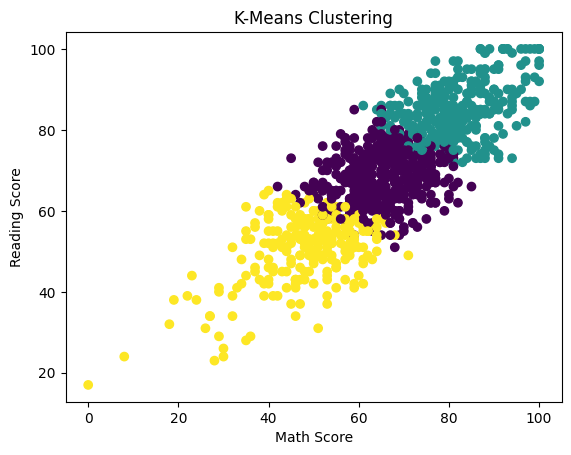

Number of students in each cluster:
cluster
0    443
1    308
2    249
Name: count, dtype: int64
Silhouette Score: 0.4054075393506606
Davies-Bouldin Index: 0.7941178880596214


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define features (math, reading, writing scores)
features = ['math_score', 'reading_score', 'writing_score']
X = data[features]

# Choose the number of clusters (k)
k = 3  # You can choose any number of clusters based on your requirements

# Create KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the dataset
data['cluster'] = cluster_labels

# Visualize the clusters (for 2D representation)
plt.scatter(X['math_score'], X['reading_score'], c=cluster_labels, cmap='viridis')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.title('K-Means Clustering')
plt.show()

# Print the number of students in each cluster
print("Number of students in each cluster:")
print(data['cluster'].value_counts())

from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate silhouette score
silhouette = silhouette_score(X, cluster_labels)

# Calculate Davies-Bouldin index
davies_bouldin = davies_bouldin_score(X, cluster_labels)

print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", davies_bouldin)


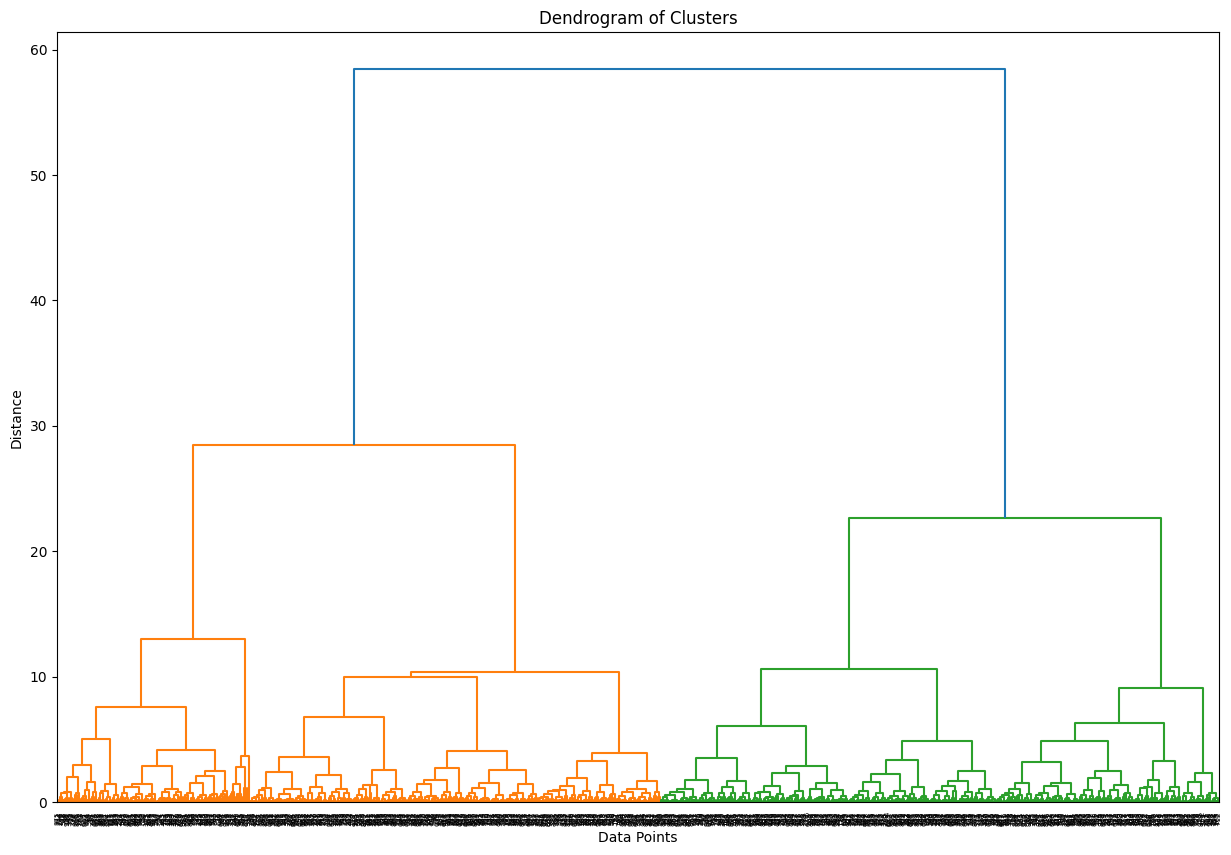

In [ ]:
# Plot the dendrogram
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate the linkage
linkage = sch.linkage(X_scaled, method='ward')

# Create the dendrogram
plt.figure(figsize=(15, 10))
sch.dendrogram(linkage, orientation='top', distance_sort='descending')
plt.title('Dendrogram of Clusters')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()